In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
np.random.seed(42)
n=200
data = {
    'emp_id':np.arange(1,n+1),
    'department':np.random.choice(['Hr','QE','DE','SDE3'],n),
    'experience_years':np.random.randint(2,16,n),
    'salary':np.random.randint(20000,40000,n),
    'performance_Score':np.random.uniform(2,15,n)
}

In [16]:
df = pd.DataFrame(data)
df.head()

,emp_id,department,experience_years,salary,performance_Score
0,1,DE,8,23987,8.448487
1,2,SDE3,2,33446,11.007575
2,3,Hr,5,21218,6.528376
3,4,DE,14,24735,14.176426
4,5,DE,5,31296,2.509422


In [31]:
dept_summary = df.groupby("department").agg({
    "salary": ["mean", "min", "max"],
    "performance_Score": "mean"
})
dept_summary

salary               performance_Score
                    mean    min    max              mean
department                                              
DE          30547.814815  20301  39738          8.689762
Hr          28421.978261  20417  37019          8.490208
QE          30305.391304  20784  39830          8.418070
SDE3        30331.759259  20190  39778          9.229330

In [33]:
salary_bins = [0, 50000, 80000, 120000, np.inf]
salary_labels = ["Low", "Medium", "High", "Very High"]

df["salary_band"] = pd.cut(
    df["salary"],
    bins=salary_bins,
    labels=salary_labels
)

df["salary_band"].value_counts()


salary_band
Low          200
Medium         0
High           0
Very High      0
Name: count, dtype: int64

In [34]:
numerical_cols = ["experience_years", "salary", "performance_Score"]

normalized_data = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()

normalized_data.head()

,experience_years,salary,performance_Score
0,-0.035138,-1.036798,-0.075546
1,-1.489107,0.609297,0.618452
2,-0.762122,-1.518670,-0.596260
3,1.418831,-0.906628,1.477811
4,-0.762122,0.235145,-1.686158


In [37]:
salary_perf_corr = np.corrcoef(
    df["salary"],
    df["performance_Score"]
)[0, 1]

print(salary_perf_corr)

0.029356709341678184


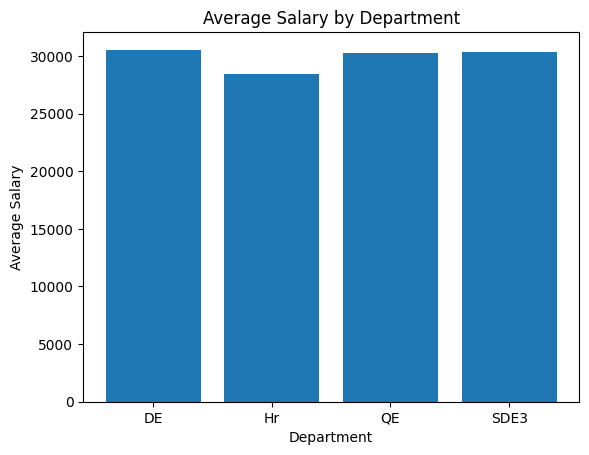

In [41]:
avg_salary = df.groupby("department")["salary"].mean()

plt.bar(avg_salary.index, avg_salary.values)
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.title("Average Salary by Department")
plt.show()

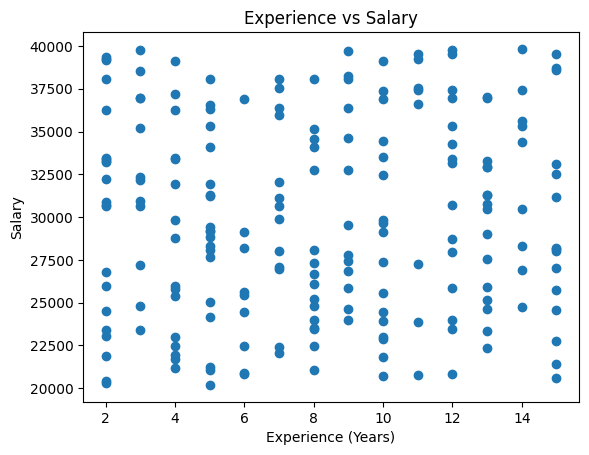

In [42]:
plt.scatter(df["experience_years"], df["salary"])
plt.xlabel("Experience (Years)")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.show()